In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

df = pkl.load(open('trajectory/master_08052022.pkl','rb'))
df.head(1)

,name,date,quantity,exposure,tracked_id,traj,VCL,VAP,VSL,LIN,STR,WOB,BeatCross,ALH,img,cluster
0,balder,01062021-25,0,0.0,1.0,"[[69, 70, 71, 71, 72, 73, 73, 74, 75, 76, 76, ...",79.95981,65.18066,60.57626,0.757584,0.929359,0.815168,30.0,4.276645,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0


In [2]:
# remove img col
df = df.drop('img', axis=1)

In [3]:
df['traj'] = df['traj'].apply(lambda x: np.array(x))
df['centered_traj'] = df['traj'].apply(lambda x: np.array([sub_array - sub_array.mean() for sub_array in x]))
#df = df.head(100)

In [4]:
df['centered_traj'][0]

array([[-11.35483871, -10.35483871,  -9.35483871,  -9.35483871,
         -8.35483871,  -7.35483871,  -7.35483871,  -6.35483871,
         -5.35483871,  -4.35483871,  -4.35483871,  -3.35483871,
         -2.35483871,  -1.35483871,  -1.35483871,   0.64516129,
          0.64516129,   1.64516129,   2.64516129,   3.64516129,
          4.64516129,   4.64516129,   6.64516129,   6.64516129,
          7.64516129,   7.64516129,   8.64516129,   8.64516129,
          9.64516129,   8.64516129,   9.64516129],
       [  2.51612903,   2.51612903,   2.51612903,   2.51612903,
          2.51612903,   2.51612903,   2.51612903,   2.51612903,
          2.51612903,   2.51612903,   1.51612903,   2.51612903,
          1.51612903,   2.51612903,   1.51612903,   1.51612903,
          0.51612903,   0.51612903,   0.51612903,  -0.48387097,
         -0.48387097,  -0.48387097,  -1.48387097,  -2.48387097,
         -2.48387097,  -3.48387097,  -3.48387097,  -4.48387097,
         -5.48387097,  -6.48387097,  -6.48387097]])

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def trajectory_to_image(trajectory, img_size=32):
    # Create a white background
    img = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255
    
    fig, ax = plt.subplots(figsize=(img_size/100, img_size/100), dpi=100)
    ax.set_facecolor('white')
    
    # Plot the trajectory
    ax.plot(trajectory[0], trajectory[1], color='black', linewidth=1)
    
    # Set axis limits and remove ticks
    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Remove axis lines
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Render the plot to a numpy array
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    plt.close(fig)
    
    return img

# Convert all trajectories to images
X = np.array([trajectory_to_image(traj) for traj in df['centered_traj']])

# X will now be a numpy array with shape (num_trajectories, img_size, img_size, 3)
print(X.shape)

/tmp/ipykernel_5340/1503041691.py:26: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


(100, 32, 32, 3)


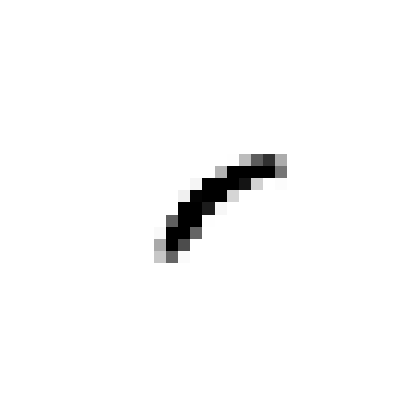

In [12]:
import matplotlib.pyplot as plt

def visualize_trajectory_image(X, index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X[index])
    plt.axis('off')
    #plt.title(f'Trajectory {index}')
    plt.show()

visualize_trajectory_image(X, 99)

In [9]:
np.save('X_data.npy',X)

In [10]:
X_ = np.load('X_data.npy')
X_.shape

(100, 32, 32, 3)